 0##

In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


1##

In [ ]:
import numpy as np
import pandas as pd

data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data=data)
print(np.round(df.isnull().sum() / len(df), 2))

size      0.17
color     0.00
gender    0.17
price     0.17
weight    0.33
bought    0.00
dtype: float64


In [ ]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [ ]:
len(df)

6

In [ ]:
np.round(df.isnull().sum() / len(df),2)

size      0.17
color     0.00
gender    0.17
price     0.17
weight    0.33
bought    0.00
dtype: float64

2##

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data=data)

In [ ]:
df.head()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['weight']] = imputer.fit_transform(df[['weight']])
df.head()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes


3##

Wylicz wartość srednią wstawioną w miejsce braków

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

https://scikit-learn.org/stable/modules/impute.html#impute

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['weight']] = imputer.fit_transform(df[['weight']])
imputer.statistics_[0]

415.0

4##

Przypisz braki wartością stałą 99.0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer


data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data=data)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
df[['price']] = imputer.fit_transform(df[['price']])
df.head()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,99.0,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes


5##

Uzupełnij size najczesciej pojawiajacymi sie elementami tej kolumny

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data=data)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['size']] = imputer.fit_transform(df[['size']])
df.head()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,M,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes


6##

Wycinam wiersz w weight gdzie jest null i wyliczam mean

In [ ]:
df = pd.DataFrame(data=data)
print(df[~df['weight'].isnull()].mean())

price     122.333333
weight    415.000000
dtype: float64


In [ ]:
df[~df['weight'].isnull()]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


7##

Identfikuje kolumny typu object i uzupełniam braki kolumn wartością empty

In [ ]:
df_object = df.select_dtypes(include=['object']).fillna('empty')
df_object

,size,color,gender,bought
0,XL,red,female,yes
1,L,green,male,no
2,M,blue,empty,yes
3,empty,green,female,no
4,M,red,female,yes
5,M,green,male,no


8##

Robię dyskretyzację kolumny weight na 3 przedziały o równiej szerokości 

In [ ]:
import pandas as pd


df = pd.DataFrame(data={'weight': [75., 78.5, 85., 91., 84.5, 83., 68.]})

In [ ]:
df

,weight
0,75.0
1,78.5
2,85.0
3,91.0
4,84.5
5,83.0
6,68.0


In [ ]:
df = pd.DataFrame(data={'weight': [75., 78.5, 85., 91., 84.5, 83., 68.]})
df['weight_cut'] = pd.cut(df['weight'], bins=3)
df

,weight,weight_cut
0,75.0,"(67.977, 75.667]"
1,78.5,"(75.667, 83.333]"
2,85.0,"(83.333, 91.0]"
3,91.0,"(83.333, 91.0]"
4,84.5,"(83.333, 91.0]"
5,83.0,"(75.667, 83.333]"
6,68.0,"(67.977, 75.667]"


9##

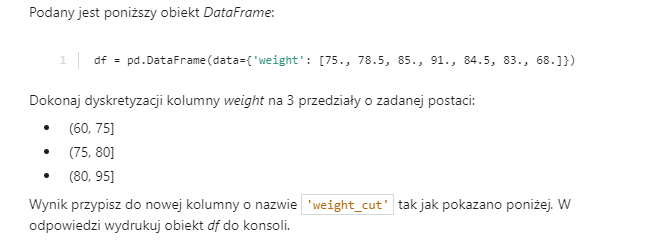

In [ ]:
import pandas as pd
df = pd.DataFrame(data={'weight': [75., 78.5, 85., 91., 84.5, 83., 68.]})
df.head()

,weight
0,75.0
1,78.5
2,85.0
3,91.0
4,84.5


In [ ]:
df['weight_cut'] = pd.cut(df['weight'], bins=(60, 75, 80, 95))
df.head()

,weight,weight_cut
0,75.0,"(60, 75]"
1,78.5,"(75, 80]"
2,85.0,"(80, 95]"
3,91.0,"(80, 95]"
4,84.5,"(80, 95]"


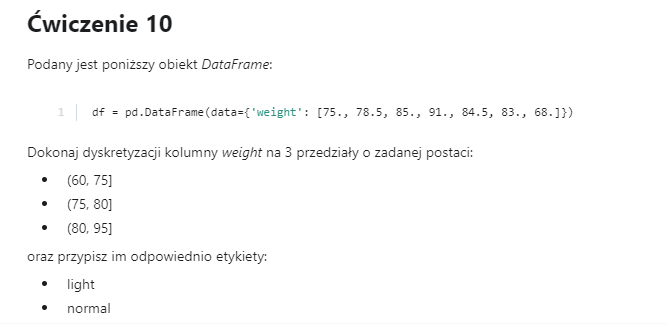

In [ ]:
import pandas as pd
df = pd.DataFrame(data={'weight': [75., 78.5, 85., 91., 84.5, 83., 68.]})
df.head()

,weight
0,75.0
1,78.5
2,85.0
3,91.0
4,84.5


In [ ]:
df = pd.DataFrame(data={'weight': [75., 78.5, 85., 91., 84.5, 83., 68.]})
df['weight_cut'] = pd.cut(df['weight'], bins=(60, 75, 80, 95), labels=['light', 'normal', 'heavy'])
df.head()

,weight,weight_cut
0,75.0,light
1,78.5,normal
2,85.0,heavy
3,91.0,heavy
4,84.5,heavy


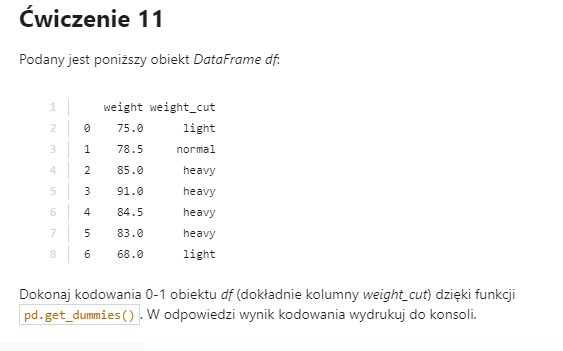

In [ ]:
import pandas as pd

df = pd.DataFrame(data={'weight': [75., 78.5, 85., 91., 84.5, 83., 68.]})
df['weight_cut'] = pd.cut(df['weight'], bins=(60, 75, 80, 95), labels=['light', 'normal', 'heavy'])
df.head()

,weight,weight_cut
0,75.0,light
1,78.5,normal
2,85.0,heavy
3,91.0,heavy
4,84.5,heavy


In [ ]:
df = pd.get_dummies(df)
df.head()

,weight,weight_cut_light,weight_cut_normal,weight_cut_heavy
0,75.0,1,0,0
1,78.5,0,1,0
2,85.0,0,0,1
3,91.0,0,0,1
4,84.5,0,0,1


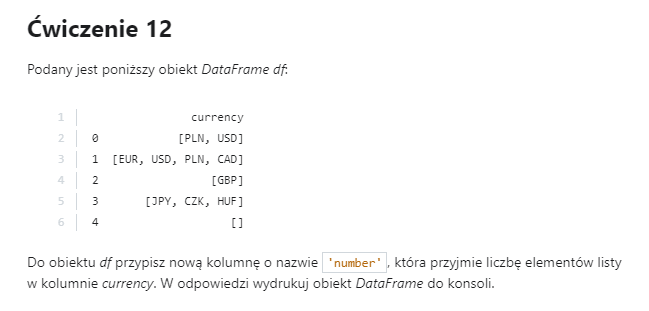

In [ ]:
import pandas as pd

data_dict = {
    'currency': [['PLN', 'USD'], ['EUR', 'USD', 'PLN', 'CAD'], ['GBP'], ['JPY', 'CZK', 'HUF'], []]
}
df = pd.DataFrame(data=data_dict)
df.head()

,currency
0,"[PLN, USD]"
1,"[EUR, USD, PLN, CAD]"
2,[GBP]
3,"[JPY, CZK, HUF]"
4,[]


In [ ]:
df = pd.DataFrame(data=data_dict)
df['number'] = df['currency'].apply(len)
df.head()

,currency,number
0,"[PLN, USD]",2
1,"[EUR, USD, PLN, CAD]",4
2,[GBP],1
3,"[JPY, CZK, HUF]",3
4,[],0


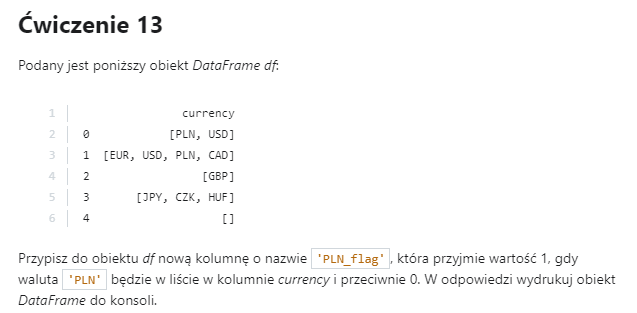

In [ ]:
import pandas as pd

data_dict = {
    'currency': [['PLN', 'USD'], ['EUR', 'USD', 'PLN', 'CAD'], ['GBP'], ['JPY', 'CZK', 'HUF'], []]
}
df = pd.DataFrame(data=data_dict)
df.head()

,currency
0,"[PLN, USD]"
1,"[EUR, USD, PLN, CAD]"
2,[GBP]
3,"[JPY, CZK, HUF]"
4,[]


In [ ]:
df = pd.DataFrame(data=data_dict)
df['PLN_flag'] = df['currency'].apply(lambda ex: 1 if 'PLN' in ex else 0)
df.head()

,currency,PLN_flag
0,"[PLN, USD]",1
1,"[EUR, USD, PLN, CAD]",1
2,[GBP],0
3,"[JPY, CZK, HUF]",0
4,[],0


In [ ]:
import pandas as pd
df = pd.DataFrame(data={'hashtags': ['#good#vibes', '#hot#summer#holiday', '#street#food', '#workout']})
df.head()

,hashtags
0,#good#vibes
1,#hot#summer#holiday
2,#street#food
3,#workout


In [ ]:
df = df['hashtags'].str.split('#', expand=True)
df = df.drop(columns=[0])
df.columns = ['hashtag1', 'hashtag2', 'hashtag3']
df.head()

,hashtag1,hashtag2,hashtag3
0,good,vibes,None
1,hot,summer,holiday
2,street,food,None
3,workout,None,None


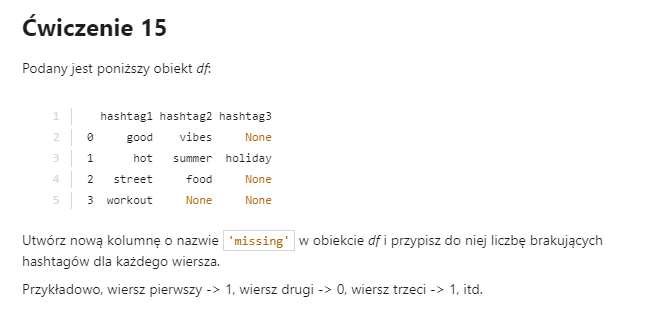

In [ ]:
import pandas as pd

df = pd.DataFrame(data={'hashtags': ['#good#vibes', '#hot#summer#holiday', '#street#food', '#workout']})
df = df['hashtags'].str.split('#', expand=True)
df = df.drop(columns=[0])
df.columns = ['hashtag1', 'hashtag2', 'hashtag3']
df.head()

,hashtag1,hashtag2,hashtag3
0,good,vibes,None
1,hot,summer,holiday
2,street,food,None
3,workout,None,None


In [ ]:
df['missing'] = df.isnull().sum(axis=1)
df.head()

,hashtag1,hashtag2,hashtag3,missing
0,good,vibes,None,1
1,hot,summer,holiday,0
2,street,food,None,1
3,workout,None,None,2
